# DSHARP absorption-only opacities
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  06/12/2024          |
| Updated |  07/07/2024          |

See [Desmos](https://www.desmos.com/) for interactive plots of 
- [$T = P/\rho$](https://www.desmos.com/calculator/ptyevuziu7)
- [$\rho_\mathrm{mid}$](https://www.desmos.com/calculator/ubtsqj1ltb)
- [$\rho(\theta)$](https://www.desmos.com/calculator/marlugmhhr)

In code units,
\begin{align*}
  T(r, \theta) &= \frac{P(r, \theta)}{\rho} = \frac{P_0}{\rho_0}\left(\frac{r\sin\theta}{r_0}\right)^{-1/2}, \\
  \rho_\mathrm{mid}(r) &= \frac{\rho_0\left(\frac{r + r_0}{r_0}\right)^{-9/4}}{1 + \exp\left[-\mathrm{e}^\mathrm{e}\left(\frac{r - r_0}{r_0}\right)\right]}, \\
  \rho(r, \theta) &= \rho_\mathrm{mid}\exp\left[\frac{GMr}{P}\left(\frac{1}{\sqrt{r^2\sin^2\theta + r^2\cos^2\theta}} - \frac{1}{r\sin\theta}\right)\right], \\
                  &= \rho_\mathrm{mid}\exp\left[\frac{GM}{P}\left(1 - \frac{1}{\sin\theta}\right)\right]. \\
\end{align*}

## DSHARP Opacities

- Birnstiel et al. ([2018](https://ui.adsabs.harvard.edu/abs/2018ApJ...869L..45B/abstract))
- (From Shangjia Zhang)
  - 30% water
  - Carbon?

Reading dustkappa_dsharp.inp


[None,
 None,
 Text(0.5, 0, '$\\mathrm{\\lambda}$ ($\\mathrm{\\mu}$m)'),
 Text(0, 0.5, '$\\kappa_\\nu^\\mathrm{abs}$ (cm$^2$ g$^{-1}$)'),
 Text(0.5, 1.0, 'DSHARP ($a_\\mathrm{max}=1\\,\\mathrm{\\mu m}, q=3.5$)')]

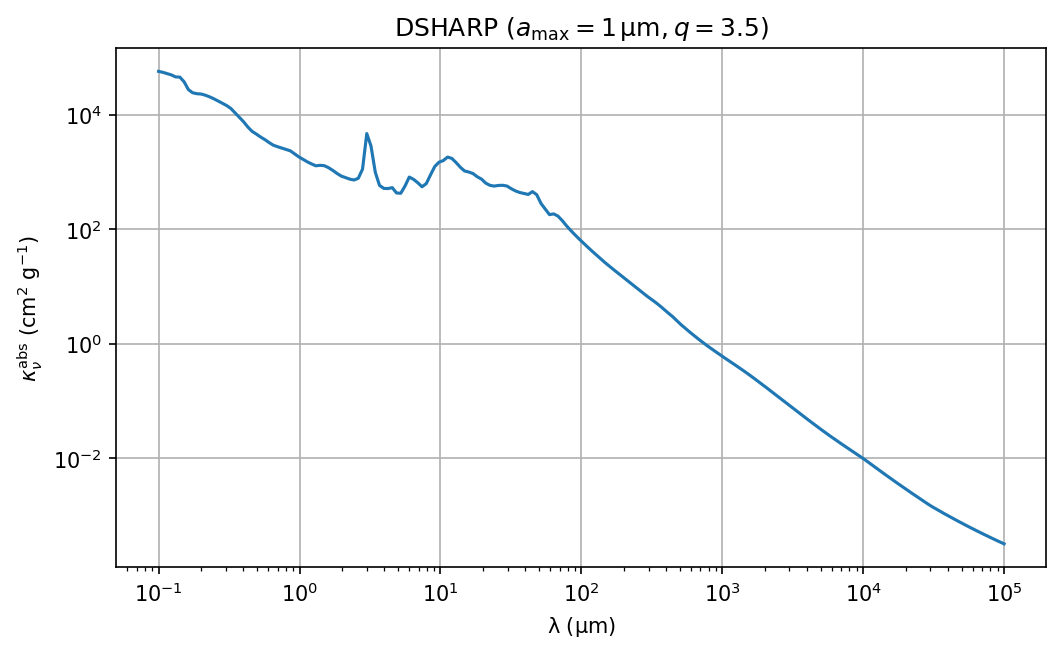

In [10]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import analyze # execute cell twice
from radmc3dPy.natconst import *

# Plot absorption coefficient as a function of wavelength
opac   = analyze.readOpac(ext=['dsharp']) #https://www.ita.uni-heidelberg.de/~dullemond/software/radmc-3d/manual_rmcpy/radmc3dPy.html?highlight=radmc3ddustopac#radmc3dPy.dustopac.radmc3dDustOpac
figsize = (4, 3)
figsize = (8, 4.5)
fig, ax = plt.subplots(figsize=figsize, dpi=150)

ax.plot(opac.wav[0], opac.kabs[0])
# ax.plot(opac.wav[0], opac.ksca[0])
ax.grid()
ax.minorticks_on()
ax.set(xscale='log', yscale='log', xlabel=r'$\mathrm{\lambda}$ ($\mathrm{\mu}$m)',
       ylabel=r'$\kappa_\nu^\mathrm{abs}$ (cm$^2$ g$^{-1}$)',
       title=r'DSHARP ($a_\mathrm{max}=1\,\mathrm{\mu m}, q=3.5$)')

## Temperature Profiles

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


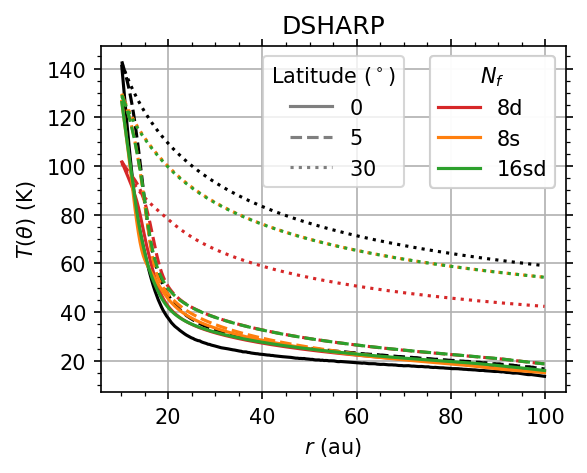

In [1]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions
rad2deg = 180/np.pi # [deg]

# Set up plots
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue',
              'tab:purple', 'tab:pink','tab:cyan', 'tab:olive',
              'tab:brown', 'tab:gray']
# lss = ['solid', 'dashdot', 'dashed', 'dotted', (0, (1, 5))]
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 85, 60]
c_solns, ls_thetas = [], []

# Read and plot RADMC-3D solutions
data = analyze.readData(ddens=True, dtemp=True)#, mint=True)
dtheta = (data.grid.yi[-1] - data.grid.yi[0])/data.grid.ny

for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(data.grid.x/natconst.au, data.dusttemp[:,j,0,0], 'black',
            ls=lss[th])
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# Read and plot Athena++ solutions
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'dsharp'
runs = [#'nfreq1', 'nfreq2', 'nfreq4', 'nfreq8',
        # 'nfreq4d', 'nfreq4s',
        'nfreq8d', 'nfreq8s', 'nfreq16sd']

for i, run in enumerate(runs):
    path = f'{base}/dsharp_abs-v2/{run}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
             /athinput['mesh']['nx2']
    L_0 = athinput['radiation']['length_unit']
    T_0 = athinput['radiation']['T_unit']
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
    T_field = athdf['press'][0]/athdf['rho'][0]*T_0
    c_solns.append(ax.plot([], [], tab_colors[i], label=f'{run[5:]}')[0])

    for th, theta_deg in enumerate(theta_degs):
        j = int(theta_deg/rad2deg/dtheta)
        ax.plot(athdf['x1v']*L_0/natconst.au, T_field[j, :], tab_colors[i],
                ls=lss[th])

# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='upper center')
color_legend = plt.legend(title=r'$N_f$', handles=c_solns, loc='upper right')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel=r'$r$ (au)', ylabel=r'$T(\theta)$ (K)',
       title=r'DSHARP')
ax.tick_params(axis='both', which='both', top=True, right=True)

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


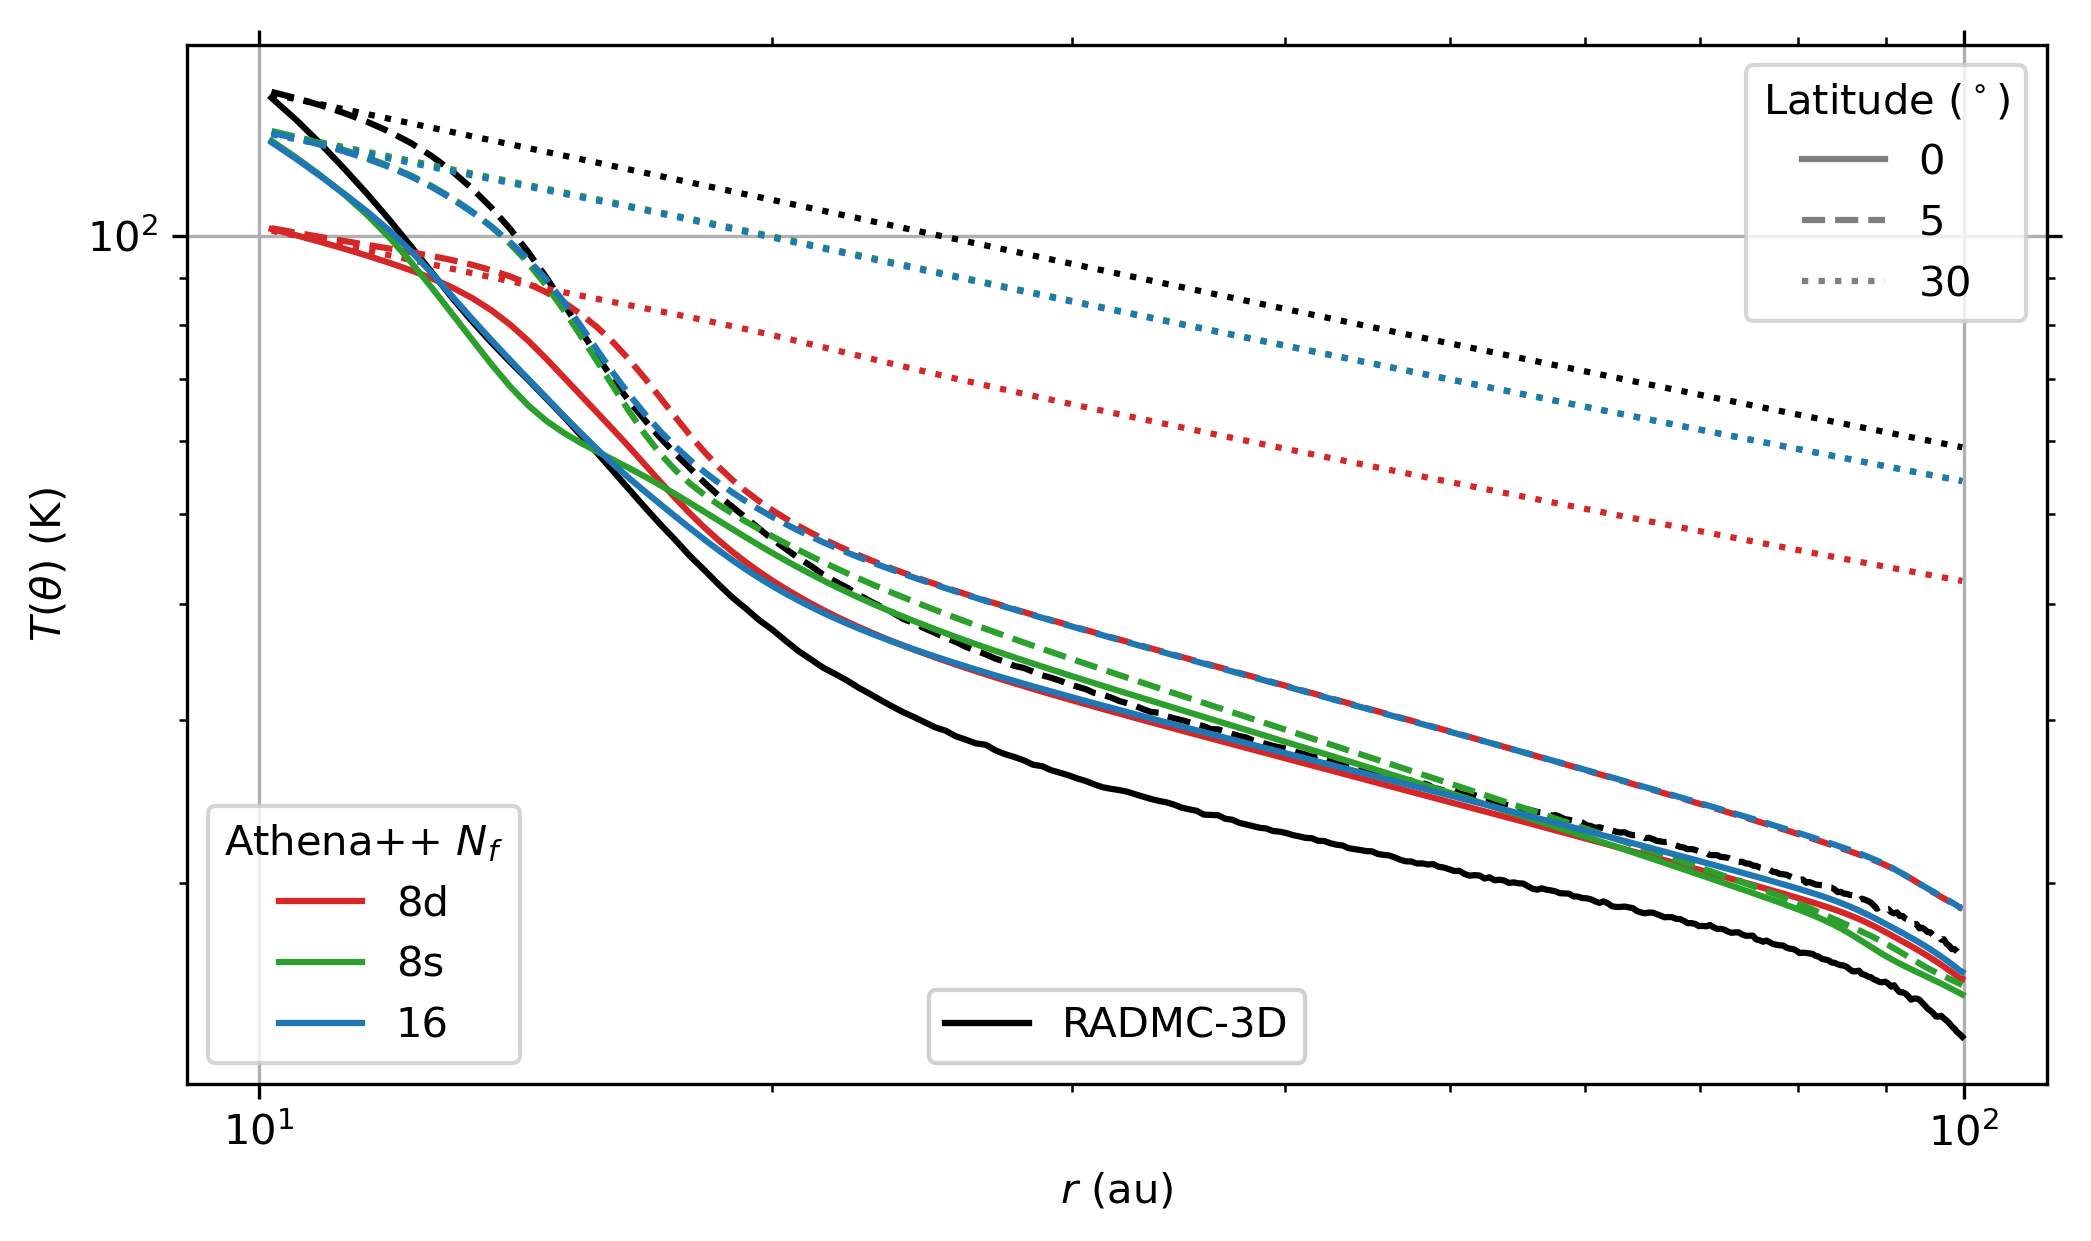

In [8]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions
rad2deg = 180/np.pi # [deg]

# Set up plots
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:green', 'tab:blue',
              'tab:purple', 'tab:pink','tab:cyan', 'tab:olive',
              'tab:brown', 'tab:gray']
# lss = ['solid', 'dashdot', 'dashed', 'dotted', (0, (1, 5))]
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 85, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# Read and plot RADMC-3D solutions
data = analyze.readData(ddens=True, dtemp=True)
dtheta = (data.grid.yi[-1] - data.grid.yi[0])/data.grid.ny
ref_soln.append(ax.plot([], [], color='black', label='RADMC-3D')[0])

for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(data.grid.x/natconst.au, data.dusttemp[:,j,0,0], 'black',
            ls=lss[th])
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# Read and plot Athena++ solutions
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'dsharp'
runs = ['nfreq8d', 'nfreq8s', 'nfreq16sd']

for i, run in enumerate(runs):
    path = f'{base}/dsharp_abs-v2/{run}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
             /athinput['mesh']['nx2']
    L_0 = athinput['radiation']['length_unit']
    T_0 = athinput['radiation']['T_unit']
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
    T_field = athdf['press'][0]/athdf['rho'][0]*T_0
    c_solns.append(ax.plot([], [], tab_colors[i], label=f'{run[5:7]}')[0])

    for th, theta_deg in enumerate(theta_degs):
        j = int(theta_deg/rad2deg/dtheta)
        ax.plot(athdf['x1v']*L_0/natconst.au, T_field[j, :], tab_colors[i],
                ls=lss[th])

# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='upper right')
color_legend = plt.legend(title=r'Athena++ $N_f$', handles=c_solns,
                          loc='lower left')
radmc_legend = plt.legend(handles=ref_soln, loc='lower center')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)
ax.add_artist(radmc_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel=r'$r$ (au)', ylabel=r'$T(\theta)$ (K)', xscale='log',
       yscale='log')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig('temp_profiles.png', bbox_inches='tight', pad_inches=0.01)

## Flux profiles

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat
Reading mean_intensity.out


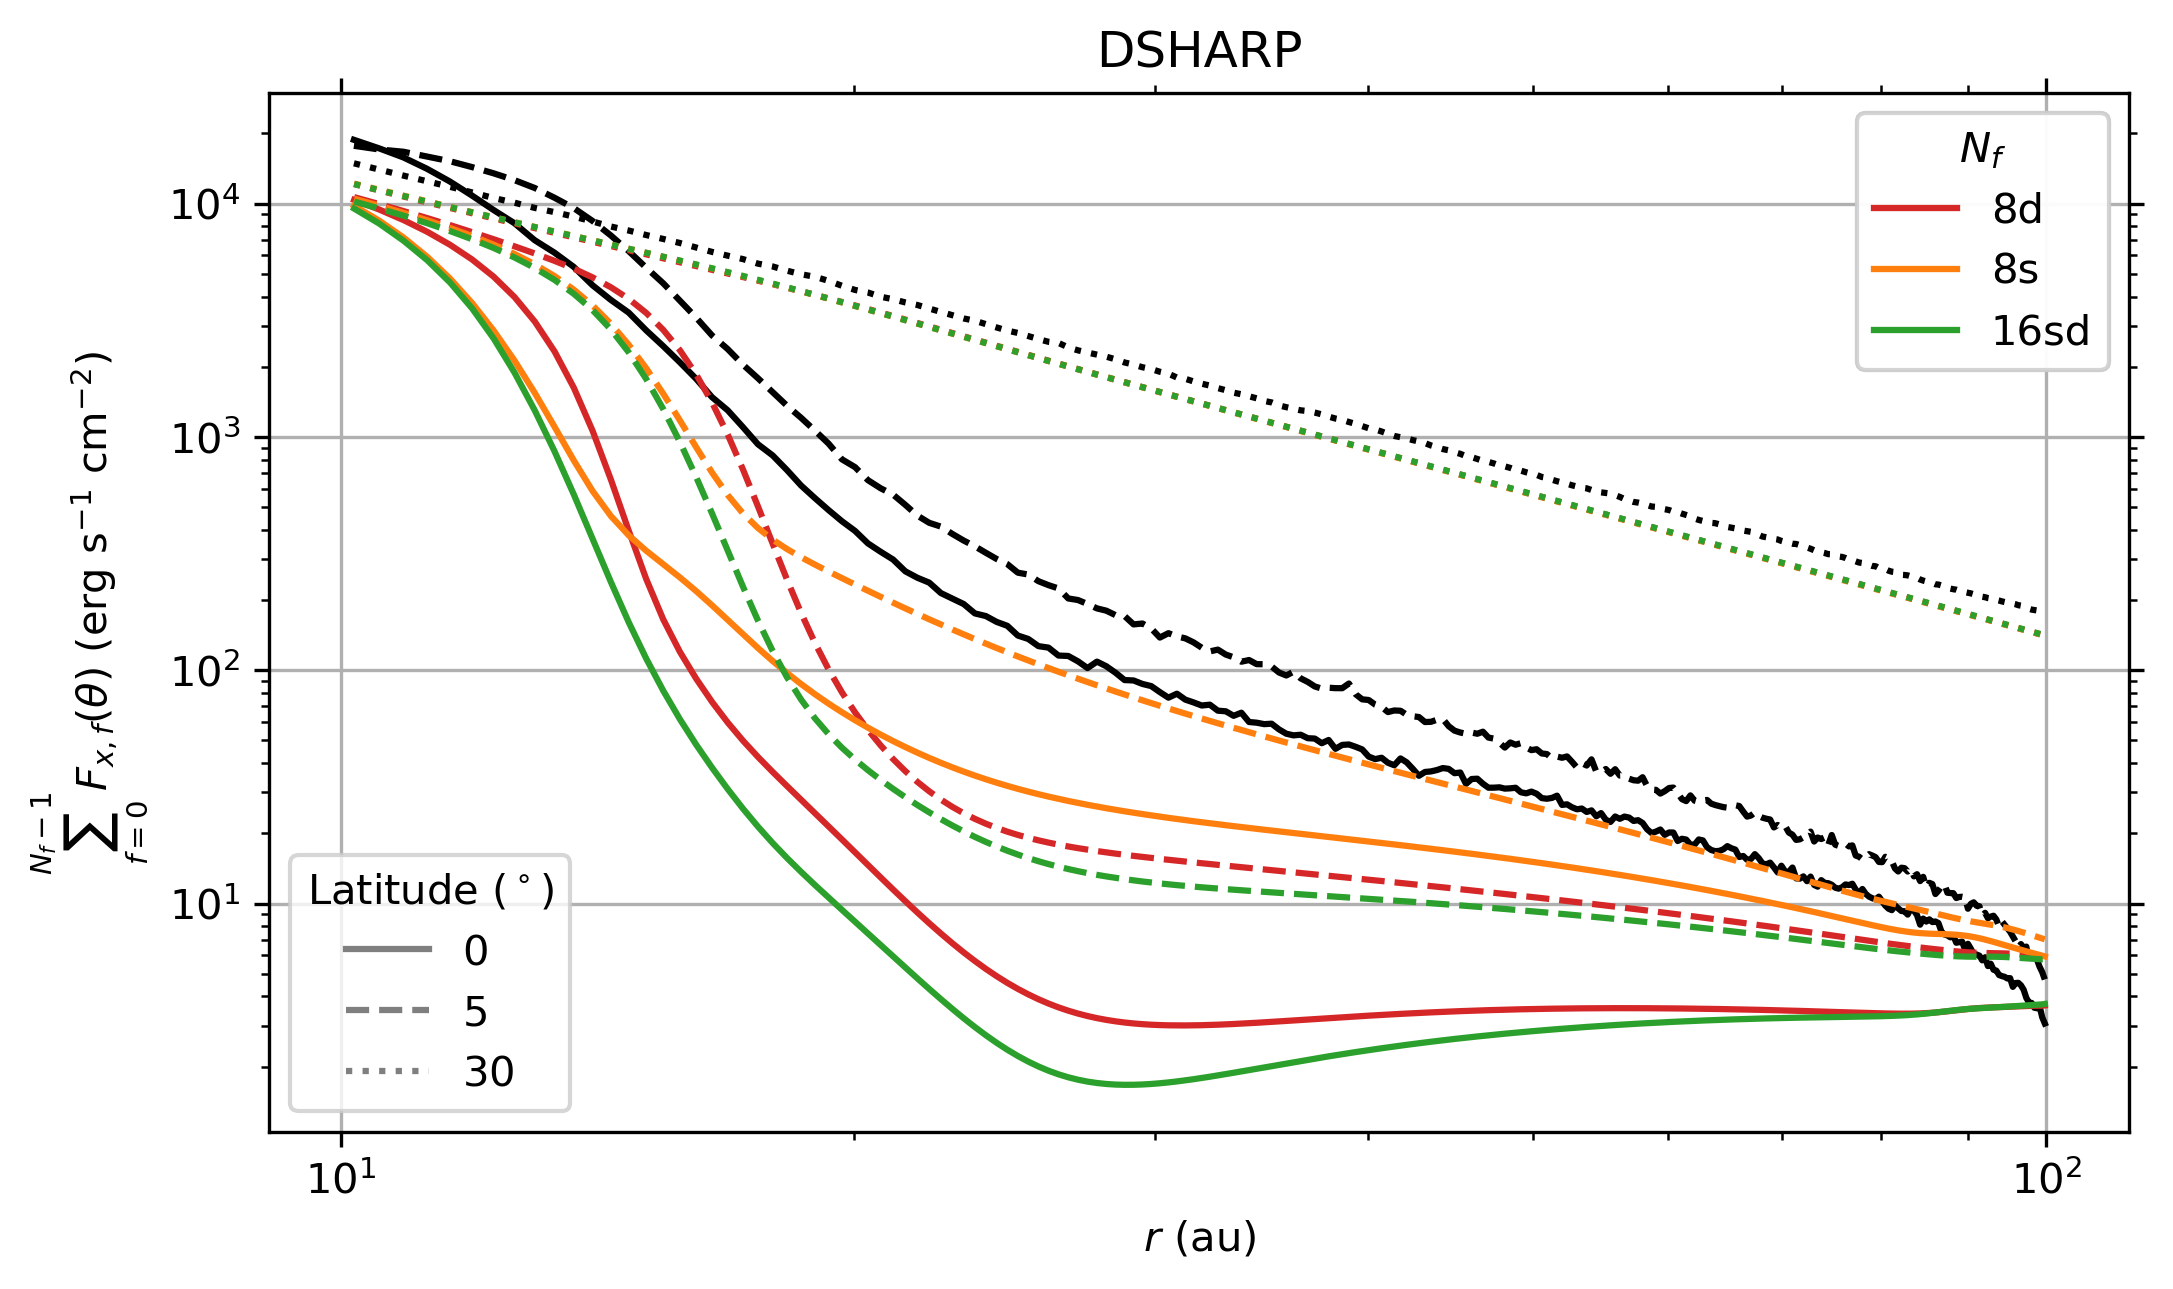

In [7]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# constants
arad = 7.565733250033928e-15
c_speed = 2.99792458e10 # // speed of light

base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'dsharp'
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue',
              'tab:purple', 'tab:pink','tab:cyan', 'tab:olive',
              'tab:brown', 'tab:gray']
theta_degs = [90, 85, 60]
lss = ['solid', 'dashed', 'dotted']
c_solns, ls_thetas = [], []
runs = [#'nfreq1', 'nfreq2', 'nfreq4', 'nfreq8',
        #'nfreq4d', 'nfreq4s',
        'nfreq8d', 'nfreq8s', 'nfreq16sd']

# Compute flux from frequency-integrated mean intensities and optical depth
data = analyze.readData(ddens=True, dtemp=True, mint=True)
F = 4*np.pi*np.abs(np.trapz(data.meanint, data.freq, axis=-1))

for th, theta_deg in enumerate(theta_degs):
    # Plot RADMC-3D solution
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(data.grid.x/natconst.au, F[:,j,0], color='black', ls=lss[th])
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# c_solns.append(ax.plot([], [], color='black', label='Analytic')[0])

# Read and plot explicit RT Athena++ solutions
for i, run in enumerate(runs):
  path = f'{base}/dsharp_abs-v2/{run}'
  athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
  dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
           /athinput['mesh']['nx2']
  L_0 = athinput['radiation']['length_unit']
  T_0 = athinput['radiation']['T_unit']
  athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
  # Radial flux field
  Fx_field = np.zeros_like(athdf['rho'][0])
  try:
    N_f = athinput['radiation']['n_frequency']
    for f in range(N_f):
      Fx_field += athdf[f'Fr_{f}_1'][0]
    Fx_field *= c_speed*arad*T_0**4
  except KeyError:
    Fx_field = athdf['Fr1'][0]*c_speed*arad*T_0**4

  for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(athdf['x1v']*L_0/natconst.au, Fx_field[j, :], color=tab_colors[i],
            ls=lss[th])

  c_solns.append(ax.plot([], [], color=tab_colors[i], label=run[5:])[0])


# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='lower left')
color_legend = plt.legend(title=r'$N_f$', handles=c_solns, loc='upper right')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xscale='log', yscale='log', xlabel=r'$r$ (au)',
       ylabel=r'$\sum_{f=0}^{N_f-1}F_{x,f}(\theta)$ (erg s$^{-1}$ cm$^{-2}$)',
       title='DSHARP')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading mean_intensity.out


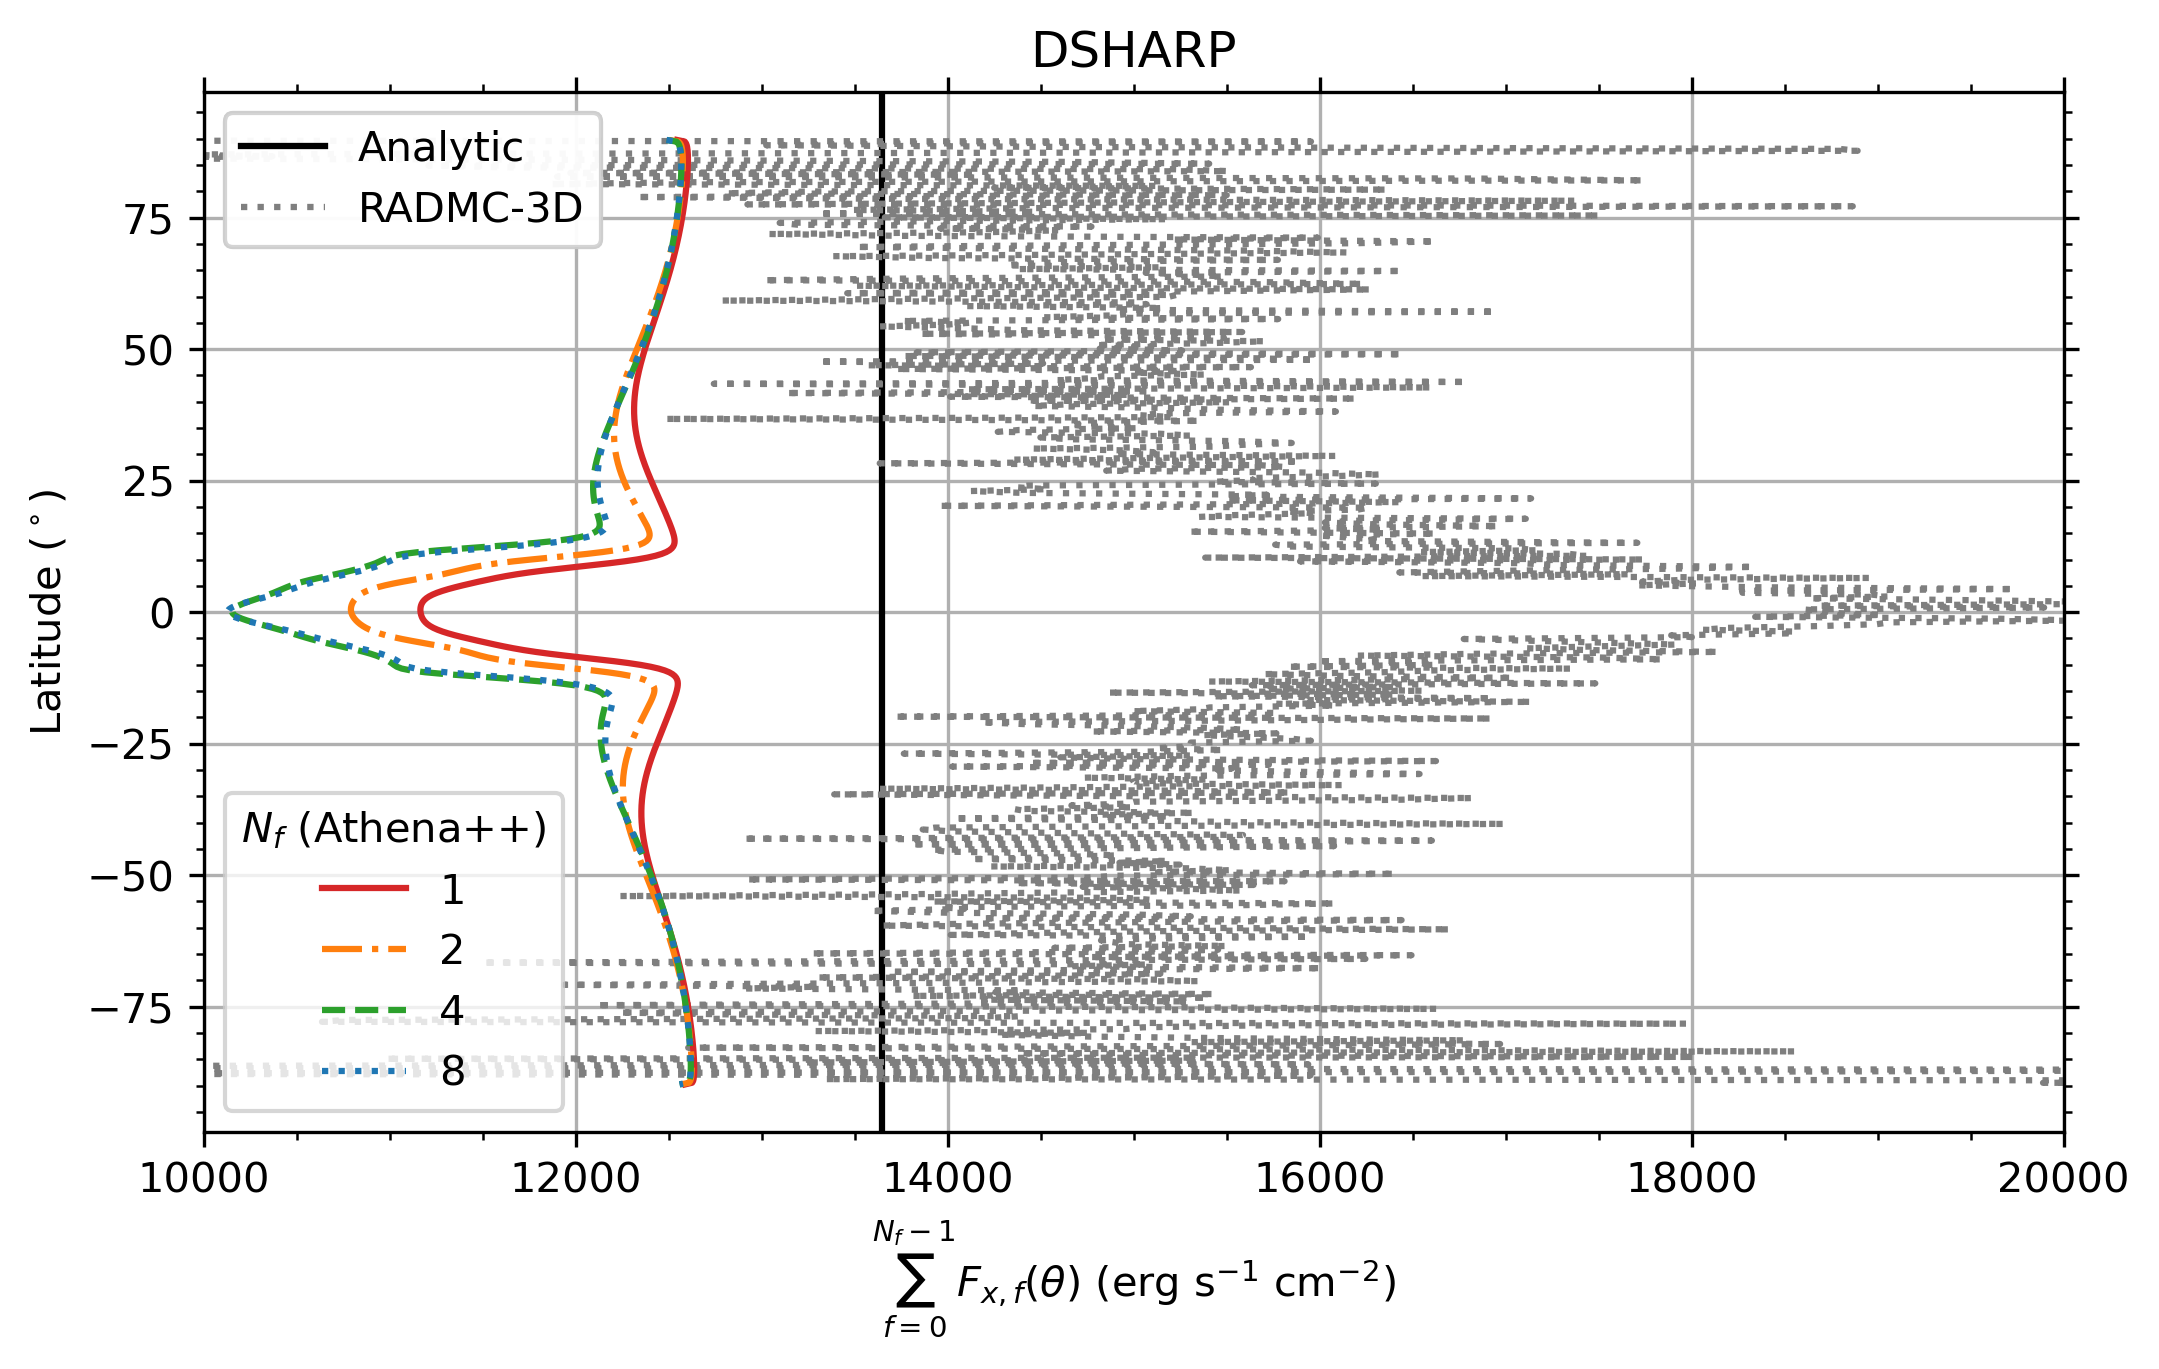

In [4]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions, constants and units
rad2deg          = 180/np.pi           # [deg]
arad = 7.565733250033928e-15
c_speed = 2.99792458e10 # // speed of light
length_unit      = 5.98e14             # L_0 [cm]
T_unit           = 6.14e3              # T_0 [K]
au               = 1.495978707e13      # astronomical unit [cm]
L_au             = length_unit/au      # [au]
R                = 1.16e-4             # solar radius [L_0]
T                = 9.42e-1             # solar temperature [T_0]

# Prepare plots
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue',
              'tab:purple', 'tab:pink','tab:cyan', 'tab:olive',
              'tab:brown', 'tab:gray']
lss = ['solid', 'dashdot', 'dashed', 'dotted', (0, (1, 5))]
c_solns, ref_soln = [], []

# Analytic
Flux = lambda r : np.power(T, 4)*np.power(R/r, 2)/4
F_theo = Flux(10/L_au)*c_speed*arad*T_unit**4
ax.axvline(F_theo, c='black')
ref_soln.append(ax.plot([], [], c='black', label='Analytic')[0])

# RADMC-3D
data = analyze.readData(mint=True)
F = 4*np.pi*np.abs(np.trapz(data.meanint, data.freq, axis=-1))
ax.plot(F[0,:,0], 90-data.grid.y*rad2deg, c='tab:gray', ls='dotted')
ref_soln.append(ax.plot([], [], c='tab:gray', ls='dotted',
                label='RADMC-3D')[0])

# Athena++
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'dsharp'
runs = ['nfreq1', 'nfreq2', 'nfreq4', 'nfreq8']
for i, run in enumerate(runs):
  path = f'{base}/dsharp_abs-v2/{run}'
  athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
  L_0 = athinput['radiation']['length_unit']
  T_0 = athinput['radiation']['T_unit']
  athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
  # Radial flux field
  Fx_field = np.zeros_like(athdf['rho'][0])
  try:
    N_f = athinput['radiation']['n_frequency']
    for f in range(N_f):
      Fx_field += athdf[f'Fr_{f}_1'][0]
    Fx_field *= c_speed*arad*T_0**4
  except KeyError:
    Fx_field = athdf['Fr1'][0]*c_speed*arad*T_0**4
  ax.plot(Fx_field[:, 0], 90-athdf['x2v']*rad2deg, c=tab_colors[i],
          ls=lss[i])
  c_solns.append(ax.plot([], [], c=tab_colors[i], ls=lss[i],
                 label=run[5:])[0])

# Plot ghost points for colorless line style and add legends
color_legend = plt.legend(title=r'$N_f$ (Athena++)', handles=c_solns,
                          loc='lower left')
ref_legend = plt.legend(handles=ref_soln, loc='upper left')
ax.add_artist(color_legend)
ax.add_artist(ref_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(title='DSHARP',
       xlabel=r'$\sum_{f=0}^{N_f-1}F_{x,f}(\theta)$ (erg s$^{-1}$ cm$^{-2}$)',
       ylabel=r'Latitude ($^\circ$)', xlim=(10000, 20000))
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)

## Opacity profiles

KeyError: 'Sigma_a_15'

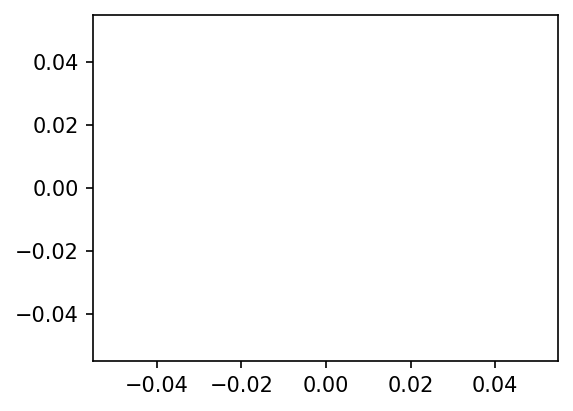

In [ ]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# constants
arad = 7.565733250033928e-15
c_speed = 2.99792458e10 # // speed of light

# Conversions
rad2deg = 180/np.pi # [deg]

base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'dsharp'
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
tab_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:blue',
              'tab:purple', 'tab:pink','tab:cyan', 'tab:olive',
              'tab:brown', 'tab:gray']
theta_degs = [90, 85, 60]
lss = ['solid', 'dashed', 'dotted']
c_solns, ls_thetas = [], []
runs = ['nfreq8d', 'nfreq8s', 'nfreq16sd']

# Compute flux from frequency-integrated mean intensities and optical depth
# data = analyze.readData(ddens=True, dtemp=True, mint=True)
# opac = analyze.readOpac(idust=[0])
# F = 4*np.pi*np.abs(np.trapz(data.meanint, data.freq, axis=-1))

for th, theta_deg in enumerate(theta_degs):
    # Plot RADMC-3D solution
    j = int(theta_deg/rad2deg/dtheta)
    # ax.plot(data.grid.x/natconst.au, F[:,j,0], color='black', ls=lss[th])
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# c_solns.append(ax.plot([], [], color='black', label='Analytic')[0])

# Read and plot explicit RT Athena++ solutions
for i, run in enumerate(runs):
  path = f'{base}/dsharp_abs-v2/{run}'
  athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
  dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
           /athinput['mesh']['nx2']
  L_0 = athinput['radiation']['length_unit']
  T_0 = athinput['radiation']['T_unit']
  athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
  # Dust oapcity field
  kappa_field = athdf[f'Sigma_a_{f}'][0]/athdf['rho'][0]

  for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(athdf['x1v']*L_0/natconst.au, kappa_field[j, :], color=tab_colors[i],
            ls=lss[th])

  c_solns.append(ax.plot([], [], color=tab_colors[i], label=run[5:])[0])


# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='lower left')
color_legend = plt.legend(title=r'$N_f$', handles=c_solns, loc='upper right')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xscale='log', yscale='log', xlabel=r'$r$ (au)',
       ylabel=r'$\sum_{f=0}^{N_f-1}F_{x,f}(\theta)$ (erg s$^{-1}$ cm$^{-2}$)',
       title=r'DSHARP')
ax.tick_params(axis='both', which='both', top=True, right=True)
# plt.savefig('filename.pdf', bbox_inches='tight', pad_inches=0.01)

## Poster

Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


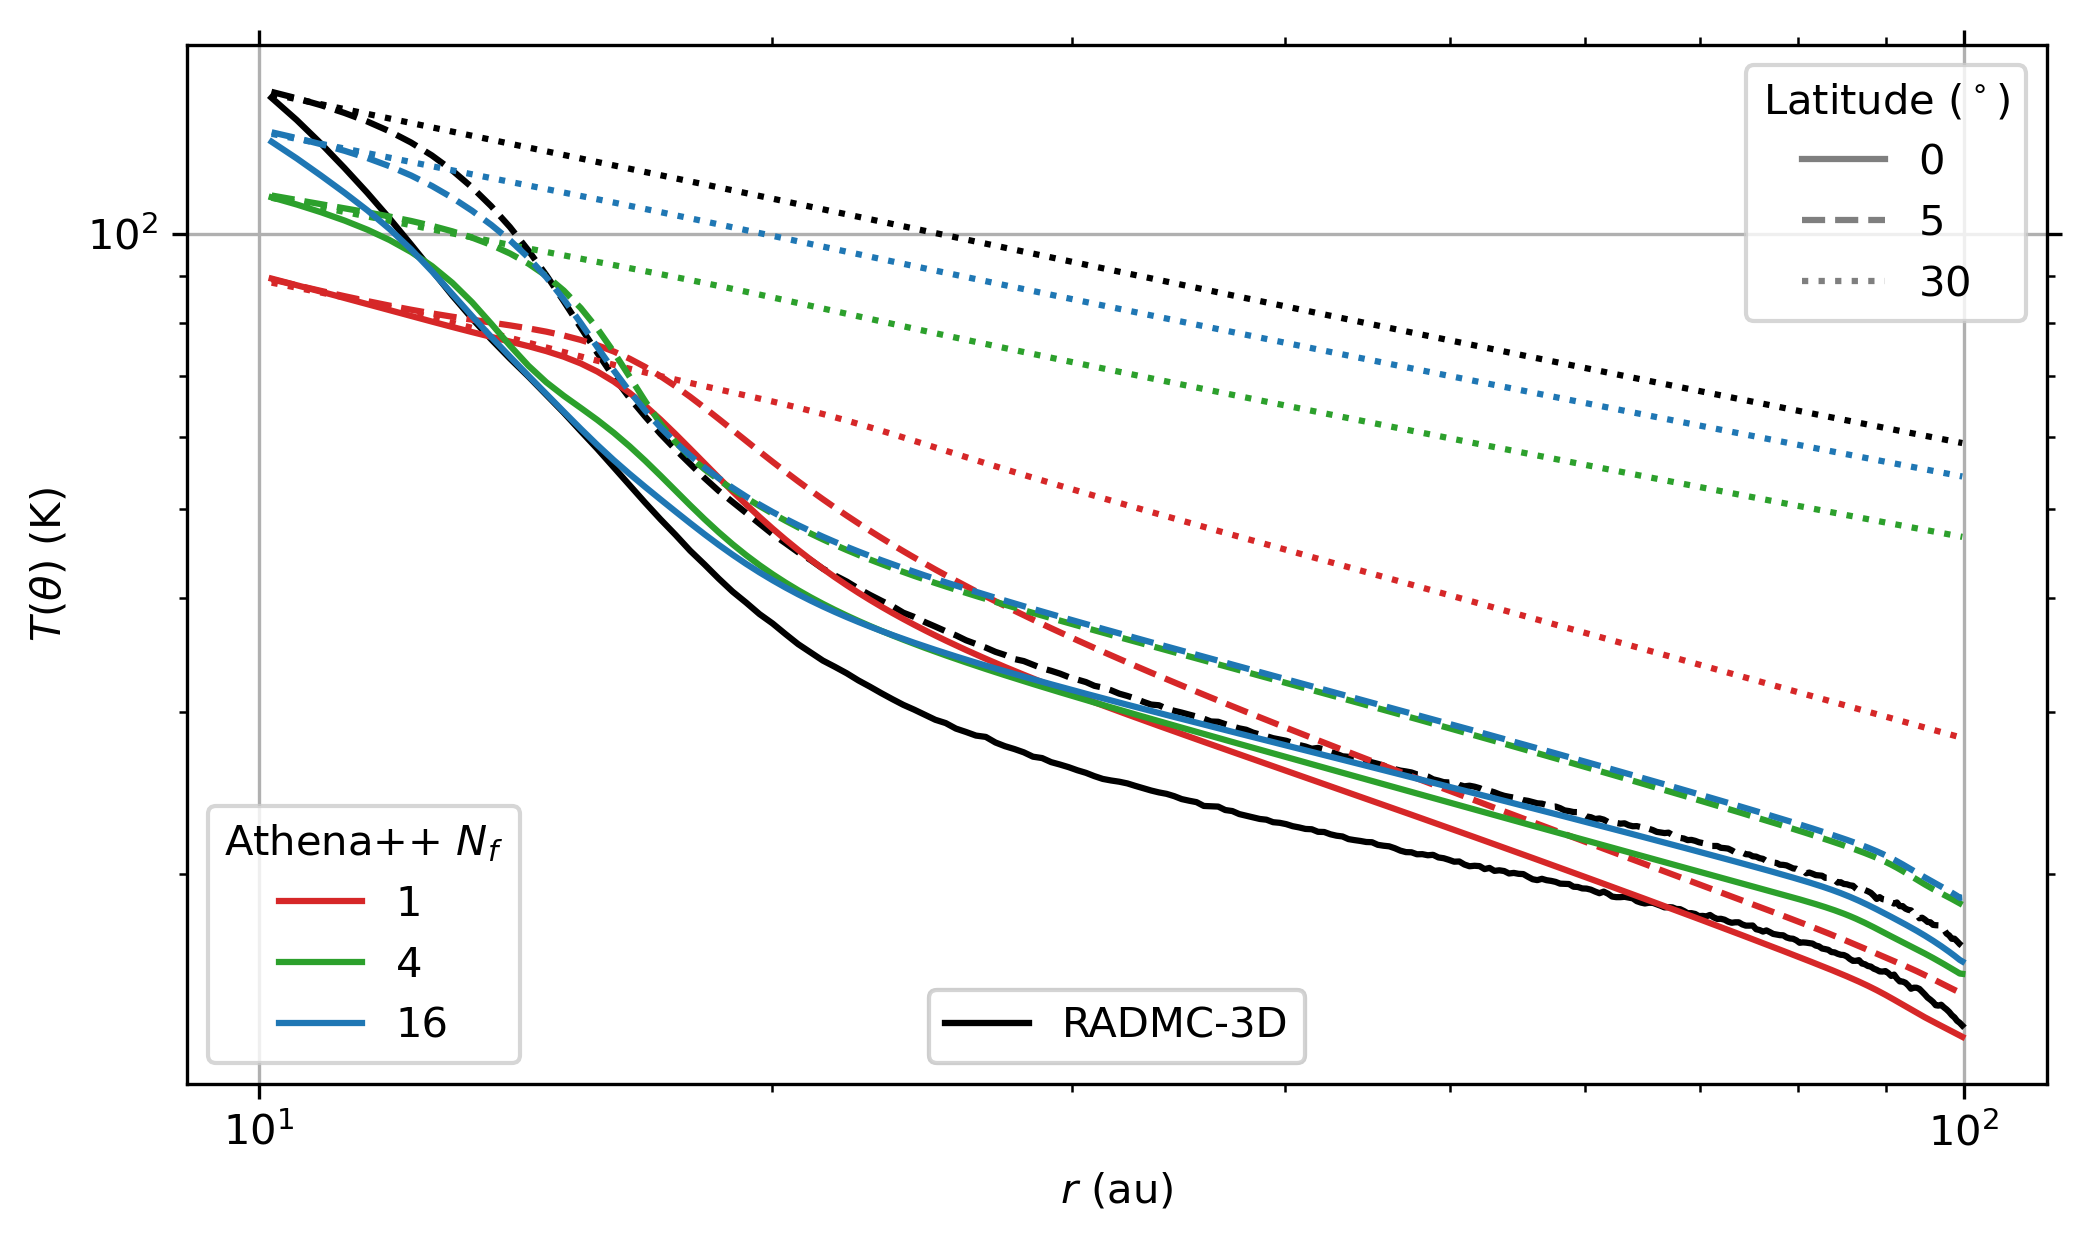

In [17]:
#===============================================================================
import matplotlib.pyplot as plt
import numpy as np
from radmc3dPy import *
import sys
sys.path.insert(0, '/home/stanley/github/PrincetonUniversity/athena/vis/python')
import athena_read

# Conversions
rad2deg = 180/np.pi # [deg]

# Set up plots
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=300)
tab_colors = ['tab:red', 'tab:green', 'tab:blue',
              'tab:purple', 'tab:pink','tab:cyan', 'tab:olive',
              'tab:brown', 'tab:gray']
# lss = ['solid', 'dashdot', 'dashed', 'dotted', (0, (1, 5))]
lss = ['solid', 'dashed', 'dotted']
theta_degs = [90, 85, 60]
c_solns, ls_thetas, ref_soln = [], [], []

# Read and plot RADMC-3D solutions
data = analyze.readData(ddens=True, dtemp=True)
dtheta = (data.grid.yi[-1] - data.grid.yi[0])/data.grid.ny
ref_soln.append(ax.plot([], [], color='black', label='RADMC-3D')[0])

for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    ax.plot(data.grid.x/natconst.au, data.dusttemp[:,j,0,0], 'black',
            ls=lss[th])
    ls_thetas.append(ax.plot([], [], color='tab:gray', ls=lss[th],
                     label=rf'${90-theta_deg}$')[0])

# Read and plot Athena++ solutions
base = '/home/stanley/github/sabaronett/rad-hydro/athena/dev/yanfeij'
problem_id = 'dsharp'
runs = ['nfreq1', 'nfreq4', 'nfreq16sd']

for i, run in enumerate(runs):
    path = f'{base}/dsharp_abs-v2/{run}'
    athinput = athena_read.athinput(f'{path}/athinput.{problem_id}')
    dtheta = (athinput['mesh']['x2max'] - athinput['mesh']['x2min'])\
             /athinput['mesh']['nx2']
    L_0 = athinput['radiation']['length_unit']
    T_0 = athinput['radiation']['T_unit']
    athdf = athena_read.athdf(f'{path}/athdf/{problem_id}.out1.00001.athdf')
    T_field = athdf['press'][0]/athdf['rho'][0]*T_0
    c_solns.append(ax.plot([], [], tab_colors[i], label=f'{run[5:7]}')[0])

    for th, theta_deg in enumerate(theta_degs):
        j = int(theta_deg/rad2deg/dtheta)
        ax.plot(athdf['x1v']*L_0/natconst.au, T_field[j, :], tab_colors[i],
                ls=lss[th])

# Plot ghost points for colorless line style and add legends
ls_legend = plt.legend(title=r'Latitude ($^\circ)$', handles=ls_thetas,
                       loc='upper right')
color_legend = plt.legend(title=r'Athena++ $N_f$', handles=c_solns,
                          loc='lower left')
radmc_legend = plt.legend(handles=ref_soln, loc='lower center')
ax.add_artist(ls_legend)
ax.add_artist(color_legend)
ax.add_artist(radmc_legend)

# Format (sub)plots
ax.grid()
ax.minorticks_on()
ax.set(xlabel=r'$r$ (au)', ylabel=r'$T(\theta)$ (K)', xscale='log',
       yscale='log')
ax.tick_params(axis='both', which='both', top=True, right=True)
plt.savefig('temp_profiles.png', bbox_inches='tight', pad_inches=0.01)